# Basic Bayesian Regression Example
This example will show you how to use one of the provided data sets and ```amorf.probabalisticRegression.BayesianNeuralNetworkRegression``` to perform a basic bayesian multi-output Regression

## Set Up Training and Test Set


In [1]:
import sys
sys.path.append("../")
from amorf.datasets import EDM 
from sklearn.model_selection import train_test_split  

X, y = EDM().get_numpy() 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import normalize 

X_train = normalize(X_train) 
X_test = normalize(X_test)

## Initialize and Train Estimator


In [3]:
from  amorf.probabalisticRegression import BayesianNeuralNetworkRegression
model = BayesianNeuralNetworkRegression(patience=5,training_limit=None, use_gpu=False, batch_size=2000) 

model.fit(X_train,y_train) 


/home/davidhildner/anaconda3/envs/ppl/lib/python3.7/site-packages/pyro/primitives.py:347: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)
Epoch: 0
Validation Error: 38923.943359375 
Train Error: 40643.953125
Epoch: 500
Validation Error: 28643.9404296875 
Train Error: 29185.404296875
Epoch: 1000
Validation Error: 18662.556884765625 
Train Error: 19047.671020507812
Epoch: 1500
Validation Error: 10147.892578125 
Train Error: 10518.98828125
Epoch: 2000
Validation Error: 4280.630859375 
Train Error: 4878.927734375
Final Epochs: 2289 
Final Train Error: 3040.51171875
Final Validation Error: 2629.984375


## Perform Prediction and Calculate Error 


In [4]:
from  amorf.metrics import average_relative_root_mean_squared_error
stds,means = model.predict(X_test,y_test) 
average_relative_root_mean_squared_error(means,y_test)

1.075394332408905

## Plot Mean Standard Dev. 

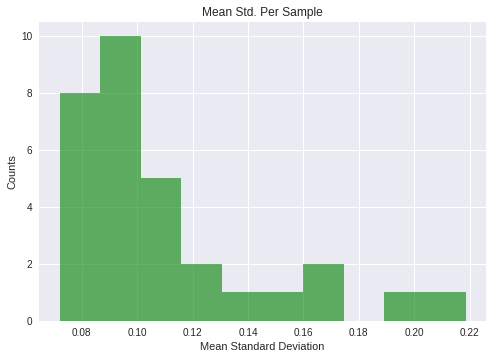

In [13]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np

style.use('seaborn')

plt.hist(np.mean(stds,1), facecolor='green', alpha=0.6)

plt.title('Mean Std. Per Sample')
plt.xlabel('Mean Standard Deviation')
plt.ylabel('Counts')
plt.show() 


## Plot Standard Dev Per Target

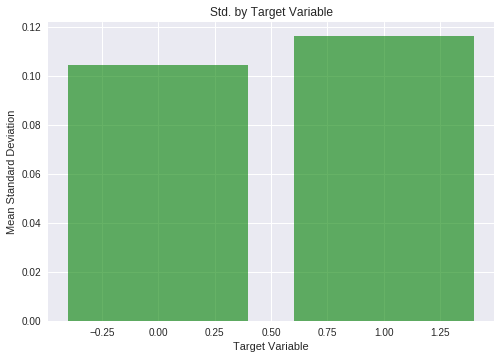

In [14]:
plt.bar(range(2),np.mean(stds,0), facecolor='green', align='center',alpha=0.6)
 
plt.title('Std. by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Mean Standard Deviation')
plt.show() 

In [15]:
print(stds)

[[0.09171828 0.10475151]
 [0.14183189 0.17223917]
 [0.09635159 0.09456087]
 [0.10754738 0.09104374]
 [0.20195033 0.2350193 ]
 [0.09748723 0.10808493]
 [0.08385517 0.09191851]
 [0.10607406 0.11633184]
 [0.10477208 0.133702  ]
 [0.07762295 0.09060956]
 [0.07379007 0.09226774]
 [0.06780895 0.07888191]
 [0.08568568 0.09618879]
 [0.07650515 0.08256452]
 [0.0827914  0.08233768]
 [0.19191648 0.21037774]
 [0.08766274 0.09005798]
 [0.11897667 0.13057257]
 [0.08416912 0.07313143]
 [0.09868078 0.10099666]
 [0.10741926 0.12365683]
 [0.07492816 0.08425471]
 [0.10309766 0.10033958]
 [0.13702215 0.14480579]
 [0.07411758 0.10283925]
 [0.14645377 0.18709534]
 [0.10709744 0.1227352 ]
 [0.08975612 0.10806537]
 [0.06741039 0.07679368]
 [0.08793617 0.09482484]
 [0.16091795 0.17931277]]
